In [1]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [61]:
X,y = make_regression(n_samples=500, 
                      n_features = 2, 
                      n_informative=2, 
                      n_targets=1, 
                      noise=50)

In [62]:
df = pd.DataFrame({'feature1':X[:,0], 'feature2':X[:,1], 'target':y})
df.head()

,feature1,feature2,target
0,1.979301,0.417624,212.207596
1,0.680197,0.265766,67.660666
2,1.281163,-1.124831,120.937231
3,0.646341,-2.243741,-37.136218
4,0.173915,0.716724,77.442578


In [63]:
df.shape

(500, 3)

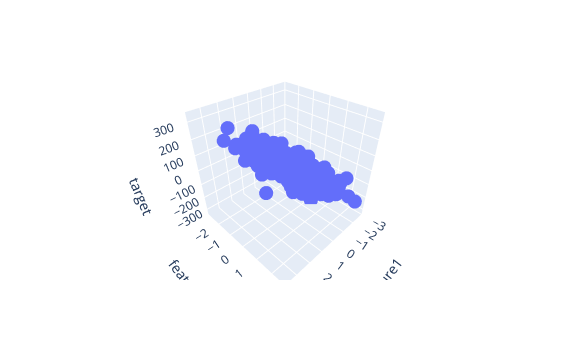

In [64]:
fig = px.scatter_3d(df, x='feature1',y='feature2',z='target')
fig.show()

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
lr = LinearRegression()

In [68]:
lr.fit(X_train, y_train)

LinearRegression()

In [69]:
y_pred = lr.predict(X_test)

In [70]:
print('MAE',mean_absolute_error(y_test, y_pred))
print('MSE',mean_squared_error(y_test, y_pred))
print('R2',r2_score(y_test, y_pred))

MAE 40.0309737586992
MSE 3008.909975348712
R2 0.7862453989788888


In [71]:
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
xGrid, yGrid = np.meshgrid(y, x)

final = np.vstack((xGrid.ravel().reshape(1, 100), yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10, 10)
z = z_final

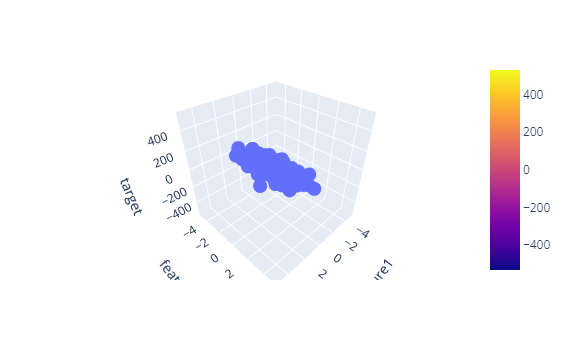

In [72]:
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')
fig.add_trace(go.Surface(x=x, y=y, z=z))
fig.show()

In [73]:
lr.coef_

array([93.78924935, 12.38224964])

In [74]:
lr.intercept_

-0.45061004184263176